## BCI waves classification using fourier transforms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

In [2]:
df = pd.read_csv('data/Avijit sir final 10,15,19.csv')

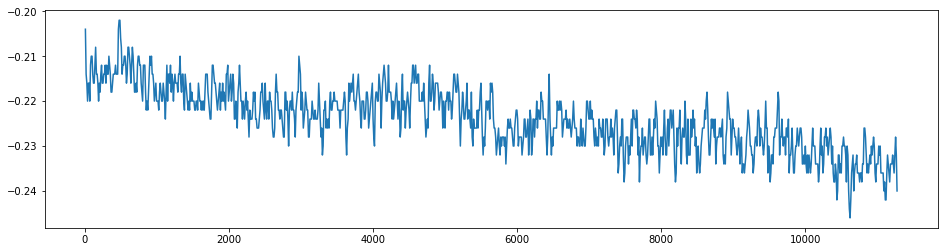

In [3]:
plt.figure(figsize=(16,4))
plt.plot(df[df['11'] != 0]['11'])

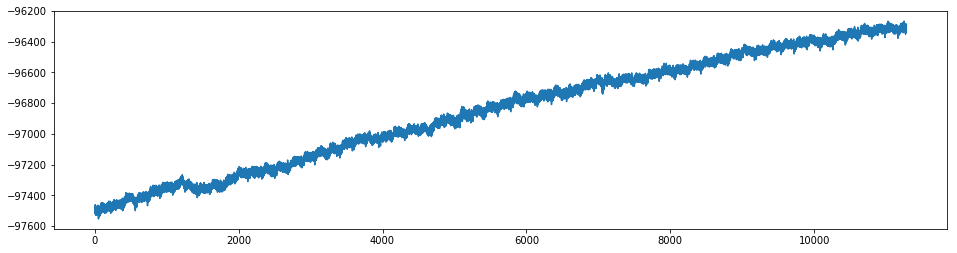

In [4]:
plt.figure(figsize=(16,4))
plt.plot(df['7'])

In [230]:
df['label'] = 2
df.loc[2850:6136]['label'] = 0
df.loc[7550:10990]['label'] = 1

In [241]:
df.loc[2850:6136]['label'] = 0
df.loc[7550:10990]['label'] = 1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [242]:
conc_data = df[df['label']==0]
conc_data.drop(['0','11','12','13','14'], axis=1, inplace=True)
conc_data.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [243]:
ext_data = df[df['label']==1]
ext_data.drop(['0','11','12','13','14'], axis=1, inplace=True)
ext_data.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [244]:
SAMPLING_FREQUENCY=200
NUMBER_OF_SAMPLES=15
LOWER_CUT=10
HIGHER_CUT=30
NOTCH=50
ORDER=4
TAKE_FOI=True
NUMBER_OF_CHANNELS=8
TESTING=True
MODE='TRAINING'

In [245]:
data_c = conc_data[:NUMBER_OF_SAMPLES*SAMPLING_FREQUENCY]
df_left = data_c
channels=[df_left['1'],df_left['2'],df_left['3'],df_left['4'],df_left['5'],df_left['6'],df_left['7'],df_left['8']]
i=['1','2','3','4','5','6','7','8']
y_left=df_left['label']
y_left=y_left[:NUMBER_OF_SAMPLES]

arr_left= []
for ch,x in zip(channels,i):    
    ch=np.asarray(df_left[x],dtype=np.float64)
    ch.flatten()
    ch=ch.reshape(NUMBER_OF_SAMPLES,SAMPLING_FREQUENCY)
    arr_left.append(ch)
arr_left=np.array(arr_left)

In [247]:
arr_right.shape

(8, 15, 200)

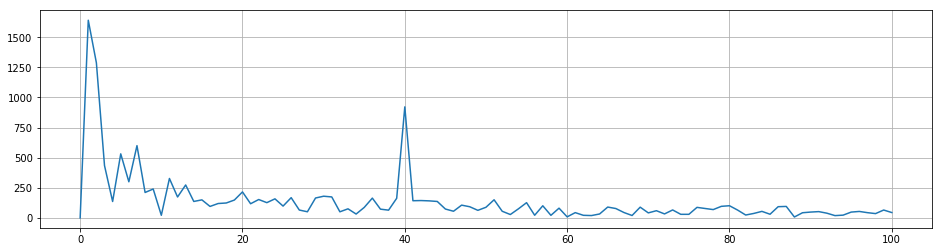

In [388]:
data_c = ext_data[:NUMBER_OF_SAMPLES*SAMPLING_FREQUENCY]
df_left = data_c
channels=[df_left['1'],df_left['2'],df_left['3'],df_left['4'],df_left['5'],df_left['6'],df_left['7'],df_left['8']]
i=['1','2','3','4','5','6','7','8']
y_left=df_left['label']
y_left=y_left[:NUMBER_OF_SAMPLES]

arr_right= []
for ch,x in zip(channels,i):    
    ch=np.asarray(df_left[x],dtype=np.float64)
    ch.flatten()
    ch=ch.reshape(NUMBER_OF_SAMPLES,SAMPLING_FREQUENCY)
    arr_right.append(ch)
arr_right=np.array(arr_right)

sequence = arr_right[0][0]
arr=np.array(sequence)
fft_coeff=np.fft.rfft(arr)
real_part=np.real(fft_coeff)
imag_part=np.imag(fft_coeff)
mag=np.sqrt((real_part*real_part)+(imag_part*imag_part))
mag[0] = 0
plt.figure(figsize=(16,4))
plt.grid()
plt.plot(mag)

In [249]:
def FFT(sequence,mag_2D=False,plot_data=False):
    
    arr=np.array(sequence)
    fft_coeff=np.fft.rfft(arr)
    real_part=np.real(fft_coeff)
    imag_part=np.imag(fft_coeff)
    mag=np.sqrt((real_part*real_part)+(imag_part*imag_part))
    
    if not TESTING:
        mag[:,:,0]=0#Removing THE DC COMPONENT
    elif mag_2D:
        mag[:,0]=0
    else:
        mag[0]=0
    print("FOURIER_TRANSFORM-'{mag}'".format(mag=mag.shape))
    if plot_data:
        plt.plot(mag)
    return mag

In [250]:
def filtering(sequence,lower_cut=LOWER_CUT,higher_cut=HIGHER_CUT,order=ORDER,notch=NOTCH,return_both=False,fs=SAMPLING_FREQUENCY):
    
    nyq=0.5*fs #normalizing
    low=lower_cut/nyq
    high=higher_cut/nyq
    sequence=sequence/nyq
    Q=30 #Q-factor
    w0=notch/nyq #Normalizing the notch
    
    b_notch,a_notch=signal.iirnotch(w0,Q)         #Designing the NOTCH filter at 50Hz
    
    sequence_after_notch=signal.lfilter(b_notch,a_notch,sequence) #Filtering The 50Hz component
    
    b_bandpass,a_bandpass=signal.butter(order,[low,high],btype='band')
    
    sequence_after_bandpass=signal.lfilter(b_bandpass,a_bandpass,sequence)
    
    if return_both:
        return  sequence_after_notch,sequence_after_bandpass
    else:
        #print(sequence_after_bandpass.shape)
        return sequence_after_bandpass

In [251]:
def DEPRECIATED_ARR(TAKE_FOI=True):
    arr_left=data_left()
    arr_right=data_right()
    filtered_array_left=filtering(arr_left)
    frequency_array_left=FFT(filtered_array_left)
    
    filtered_array_right=filtering(arr_right)
    frequency_array_right=FFT(filtered_array_right)
    
    if TAKE_FOI:
        frequency_array_left=frequency_array_left[:,:,LOWER_CUT:HIGHER_CUT+1]
        frequency_array_right=frequency_array_right[:,:,LOWER_CUT:HIGHER_CUT+1]
        print("Final Frequency shape'{freq}'".format(freq=frequency_array_right.shape))
    return frequency_array_left,frequency_array_right 

FOURIER_TRANSFORM-'(101,)'


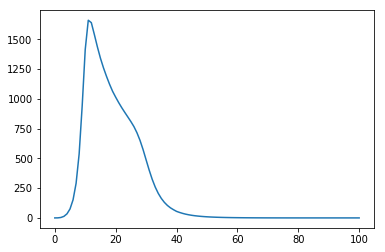

In [252]:
X=FFT(filtering(arr_left[0][10]),plot_data=True)

FOURIER_TRANSFORM-'(101,)'


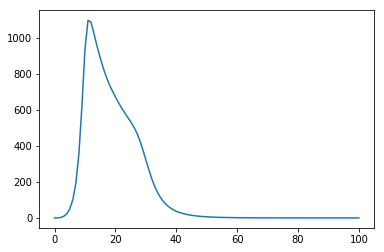

In [253]:
X=FFT(filtering(arr_right[1][10]),plot_data=True)

In [254]:
y = arr_left[0][1].reshape(-1,1)
X = np.linspace(1,200,200).reshape(-1,1)

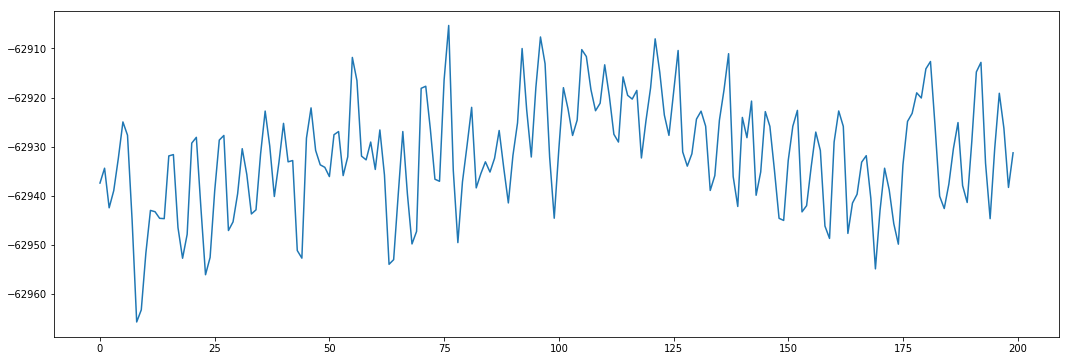

In [255]:
plt.figure(figsize=(18,6))
plt.plot(y)

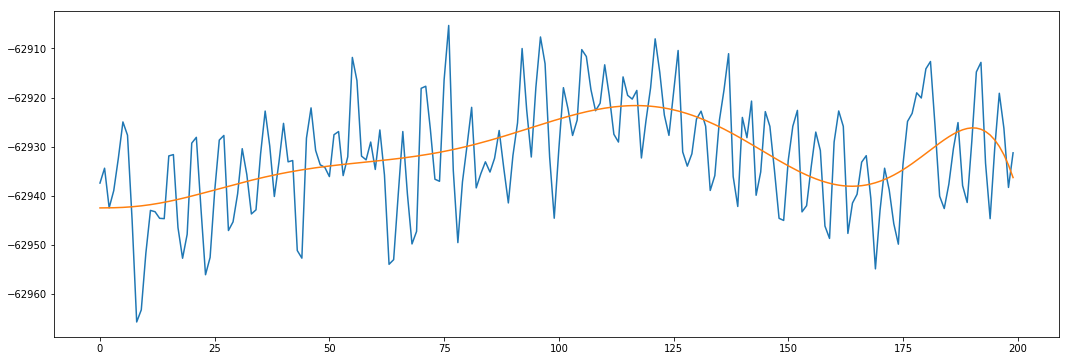

In [256]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 8)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
pred = lin_reg_2.predict(poly_reg.fit_transform(X))
plt.figure(figsize=(18,6))
plt.plot(y)
plt.plot(pred)

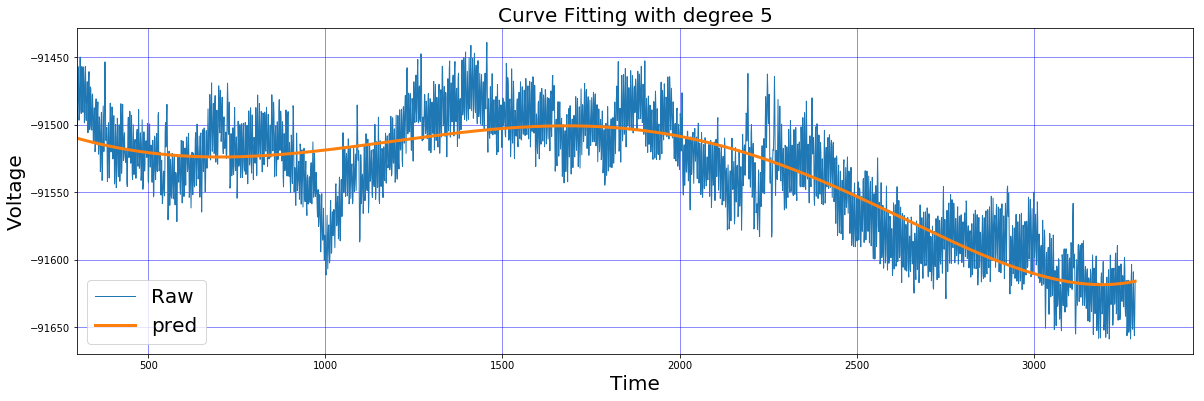

In [274]:
degree = 5
poly_reg = PolynomialFeatures(degree = degree)

y = conc_data['4'].values.reshape(-1,1)
X = np.linspace(1,len(y),len(y)).reshape(-1,1)

X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
pred = lin_reg_2.predict(poly_reg.fit_transform(X))

plt.figure(figsize=(20,6))
plt.plot(y, label='Raw', linewidth=1)
plt.plot(pred, label='pred', linewidth=3)
plt.grid(color='b', alpha=0.9, lw=0.5)
plt.title('Curve Fitting with degree {}'.format(degree), fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Voltage', fontsize=20)
plt.xlim(300)
plt.legend(fontsize=20, loc=3)

In [338]:
def smoothen(seq, order=10):
    size = len(seq)
    result = []
    for i in range(0,size,order):
        try:
            #print(i)
            rslt = 0 
            for j in range(order):
                rslt = rslt + seq[i+j]
            rslt = rslt / order
            for j in range(order):
                result.append(rslt)
        
        except IndexError:
            print()
    #print(result)        
    return result

In [343]:
a = smoothen(y[:3280].flatten(), order=5)

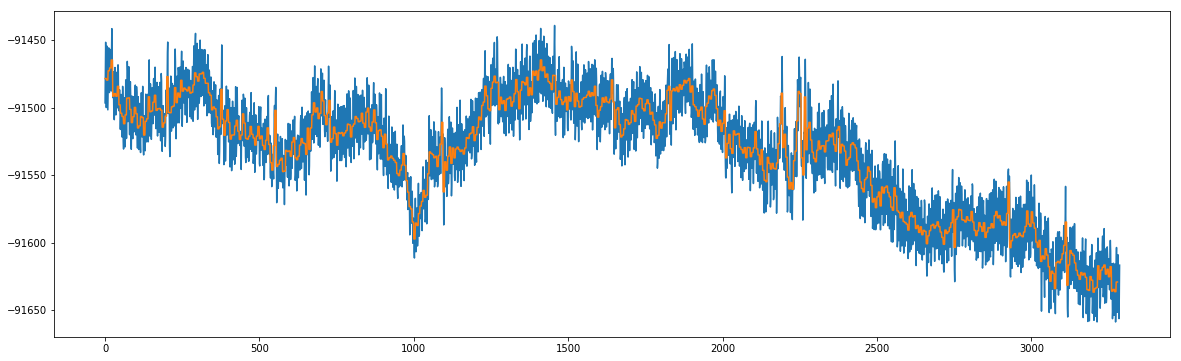

In [344]:
plt.figure(figsize=(20,6))
plt.plot(y)
plt.plot(a)

In [345]:
from scipy import signal

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


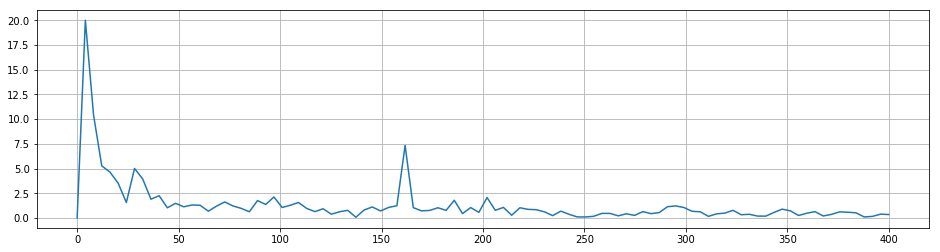

In [386]:
import scipy.fftpack

# Number of samplepoints
N = 200
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = arr_left[0][0]
yf = scipy.fftpack.fft(y)
yf[0] = 0.0
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.grid()
plt.show()